In [1]:
from functions import *
from models import *
# from livelossplot import PlotLossesKeras
# import tensorflow as tf
# os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# a = np.load('../ViaMachinae/knownstreams.npz')
# stream = pd.DataFrame(a['Gaia3'][:,[3,2,1,0,4,5]], columns = ['μ_δ','μ_α','δ','α','mag','color'])
# plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
# plt.scatter(stream.α,stream.δ,color='black',s=0.2, label="Stream")
# plt.xlabel(r"$\alpha$ [\textdegree]")
# plt.ylabel(r"$\delta$ [\textdegree]");

In [ ]:
# ### Get offsets 
# pieces = file.split('_')
# for piece in pieces:
#     if piece.startswith("l"): 
#         l = float(piece[1:])
#     elif piece.startswith("b"): 
#         b = float(piece[1:])
# print(l,b)

# plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
# plt.hist2d(df.α,df.δ,bins=50)
# # plt.colorbar()
# plt.scatter(stream.α-l,stream.δ-b,color='gray',s=0.2, label="Stream")
# plt.xlabel(r"$\alpha$ [\textdegree]")
# plt.ylabel(r"$\delta$ [\textdegree]");

In [ ]:
# plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
# plt.hist2d(df.α,df.δ,bins=50)
# plt.colorbar()
# # plt.scatter(jhelum.α-l,jhelum.δ+b,color='white',s=0.2, label="Jhelum")
# plt.xlabel(r"$\alpha$ [\textdegree]")
# plt.ylabel(r"$\delta$ [\textdegree]");

In [17]:
knownstreams_dict=np.load('../ViaMachinae/knownstreams.npz')
knownstreams=knownstreams_dict.files

def recenter_coords(x,y,vx,vy,newcenter):
    center = ICRS(ra=newcenter[0]*u.deg, dec=newcenter[1]*u.deg)

    coordinates_list= ICRS(ra=x*u.deg, dec=y*u.deg,\
                           pm_ra_cosdec=vx*u.mas/u.yr, pm_dec=vy*u.mas/u.yr)
    coordinates_list = coordinates_list.transform_to(SkyOffsetFrame(origin=center))
    newx=coordinates_list.lat.value
    newy=coordinates_list.lon.wrap_at('180d').value
    newvx=coordinates_list.pm_lat.value
    newvy=coordinates_list.pm_lon_coslat.value

    return newx,newy,newvx,newvy

knownstreams={}
for name in knownstreams:
    lat_stream,lon_stream,pmlat_stream,pmlon_stream = recenter_coords(
        knownstreams_dict[name][:,2],knownstreams_dict[name][:,3],
        knownstreams_dict[name][:,4],knownstreams_dict[name][:,5],[ra,dec])
    stars_stream =knownstreams_dict[name][(lat_stream**2+lon_stream**2<10**2) & (pmlat_stream>pmlat) & (pmlat_stream<pmlat+6) & (knownstreams_dict[name][:,4]>pmlon) & (knownstreams_dict[name][:,4]<pmlon+6)]
    if(len(stars_stream)>0):
        knownstreams[name]=stars_stream

In [18]:
knownstreams

{}

['Gjoll', 'Fjorm', 'Leiptr', 'Svol', 'Fimbulthul', 'Ylgr', 'Sylgr', 'Slidr', 'GD1', 'Gaia1', 'Gaia2', 'Gaia3', 'Gaia4', 'Gaia5', 'Jhelum', 'Indus', 'Phlegethon', 'Ophiuchus']


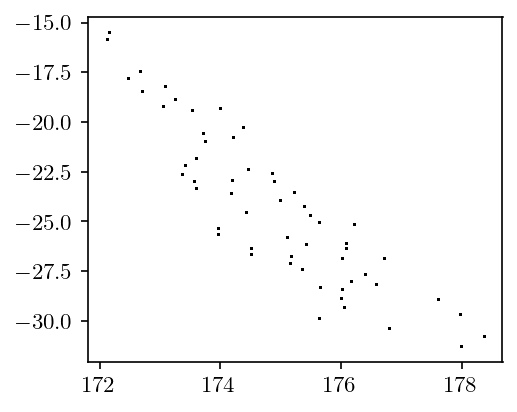

In [16]:
a = np.load('../ViaMachinae/knownstreams.npz')
print(a.files)
stream = pd.DataFrame(a['Gaia3'][:,[2,3,4,5]], columns = ['lat','lon','pmlat','pmlon'])
plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
plt.scatter(stream.lat,stream.lon,color='black',s=0.2, label="Stream")
# plt.xlabel(r"$\alpha$ [\textdegree]")
# plt.ylabel(r"$\delta$ [\textdegree]");

./gaia_data/gaia3/gaiascan_l292.5_b41.8_ra184.6_dec-20.4.npy
l = 292.5, b = 41.8, ra = 184.6, dec = -20.4


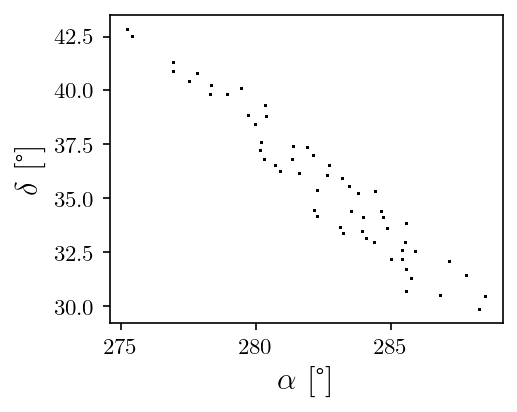

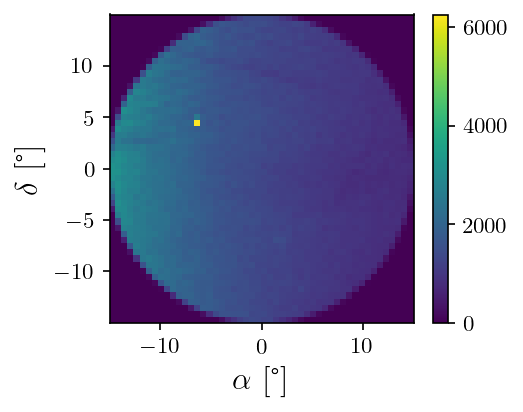

In [7]:
df, file = load_file(stream = "gaia3", percent_bkg = 100)
### Get offsets 
pieces = file.split('_')
for piece in pieces:
    if piece.startswith("ra"): 
        ra = float(piece[2:])
    elif piece.startswith("dec"): 
        dec = float(piece[3:-4])
    elif piece.startswith("l"):
        l = float(piece[1:])
    elif piece.startswith("b"):
        b = float(piece[1:])
print("l = {}, b = {}, ra = {}, dec = {}".format(l,b,ra,dec))

plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
plt.scatter(stream.α,stream.δ,color='black',s=0.2, label="Stream")
plt.xlabel(r"$\alpha$ [\textdegree]")
plt.ylabel(r"$\delta$ [\textdegree]");

plt.figure(figsize=(3.7,3), dpi=150, tight_layout=True)
plt.hist2d(df.α,df.δ,bins=50)
plt.colorbar()
plt.scatter(stream.α-ra,stream.δ-dec,color='white',s=0.2, label="Stream")
plt.xlabel(r"$\alpha$ [\textdegree]")
plt.ylabel(r"$\delta$ [\textdegree]");